In [16]:
import pandas as pd
import matplotlib.pyplot as plt

### Load Data

In [189]:
#Load .csv & exclude aggregated footer data
#url = 'https://data.london.gov.uk/download/london-borough-profiles/c1693b82-68b1-44ee-beb2-3decf17dc1f8/london-borough-profiles.csv'
#df =  pd.read_csv(url,encoding='ANSI',skipfooter=5,engine='python',na_values=['.', 'n/a'])
df = pd.read_csv('london-borough-profiles.csv',
                 skipfooter = 5, engine = 'python',
                 na_values = ['.', 'n/a'])
df.head()

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129,NaN,NaN,NaN,NaN,NaN
1,E09000002,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228,Lab,0.0,100.0,0.0,36.5
2,E09000003,Barnet,Outer London,389600,151423,"8,675",44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134,Cons,50.8,NaN,1.6,40.5
3,E09000004,Bexley,Outer London,244300,97736,"6,058",40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0.0,39.6
4,E09000005,Brent,Outer London,332100,121048,"4,323",76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3


### Unemployment Boxplot

<AxesSubplot:>

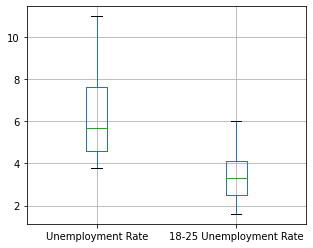

In [187]:
unemp = df[['Area_name',
            'Unemployment_rate_(2015)',
            'Youth_Unemployment_(claimant)_rate_18-24_(Dec-15)']]
unemp = unemp.rename(columns={'Area_name'
                              :'Borough',
                              'Unemployment_rate_(2015)'
                              :'Unemployment Rate',
                              'Youth_Unemployment_(claimant)_rate_18-24_(Dec-15)'
                              :'18-25 Unemployment Rate'})
unemp.set_index('Borough', inplace = True)
unemp.boxplot(column=['Unemployment Rate',
                      '18-25 Unemployment Rate'],
              figsize=(5,4))
#unemp[0:]

### Employment Boxplot

<AxesSubplot:>

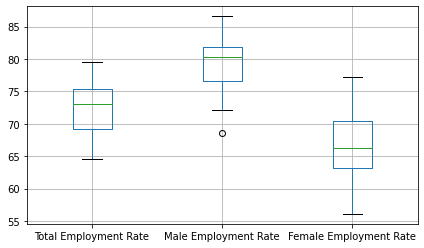

In [188]:
emp = df[['Area_name',
          'Employment_rate_(%)_(2015)',
          'Male_employment_rate_(2015)',
          'Female_employment_rate_(2015)']]
emp = emp.rename(columns={'Area_name'
                          :'Borough',
                          'Employment_rate_(%)_(2015)'
                          :'Total Employment Rate',
                          'Male_employment_rate_(2015)'
                          :'Male Employment Rate',
                          'Female_employment_rate_(2015)'
                          :'Female Employment Rate'})
emp.set_index('Borough', inplace = True)
emp.boxplot(column=['Total Employment Rate',
                    'Male Employment Rate',
                    'Female Employment Rate'],
            figsize=(7,4))

#emp[0:]